In [11]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

#Data Import
data_2024 = pd.read_csv("agg-data/county_data_2024.csv")
data_2023 = pd.read_csv("agg-data/county_data_2023.csv")
data_2022 = pd.read_csv("agg-data/county_data_2022.csv")
data_2021 = pd.read_csv("agg-data/county_data_2021.csv")
data_2020 = pd.read_csv("agg-data/county_data_2020.csv")
data_2019 = pd.read_csv("agg-data/county_data_2019.csv")

data_2024.head()



,YEAR,STATE_NAME,COUNTY_NAME,STATE_ID,COUNTY_ID,PER_CAPITA_EXP_ESRD,AVG_RISK_SCORE_ESRD,AVG_DEMOG_SCORE_ESRD,PERSON_YEARS_ESRD,PER_CAPITA_EXP_DIS,...,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS,PER_CAPITA_EXP_AGDU,AVG_RISK_SCORE_AGDU,AVG_DEMOG_SCORE_AGDU,PERSON_YEARS_AGDU,PER_CAPITA_EXP_AGND,AVG_RISK_SCORE_AGND,AVG_DEMOG_SCORE_AGND,PERSON_YEARS_AGND
0,2024,ALABAMA,AUTAUGA,1,0,99768.47,0.87284,0.94716,22.67,9492.96,...,0.90321,354.08,21672.04,0.81434,1.03373,81.75,12295.8,1.05149,1.04301,2608.75
1,2024,ALABAMA,BALDWIN,1,10,82857,0.92614,0.96378,87.33,11281.17,...,0.90529,1165.25,25855.75,0.96044,1.01298,368.83,12935.77,0.99511,1.00633,18063.75
2,2024,ALABAMA,BARBOUR,1,20,69009.3,0.87169,1.01932,14.75,17029.83,...,0.95023,178.75,20460.61,0.95206,1.03265,115.92,14608.23,1.02842,1.05332,1217.92
3,2024,ALABAMA,BIBB,1,30,80704.82,1.07887,0.93947,9.25,7812.81,...,0.92747,179.92,22960.82,1.09573,1.06421,108.33,11230.36,1.06663,1.08045,809.75
4,2024,ALABAMA,BLOUNT,1,40,75905.35,0.96364,0.97148,17.83,11737.26,...,0.91972,308.58,25246.71,0.98817,1.02623,135.75,13786.28,1.12247,1.06355,2390.33


In [21]:
for t in ["ESRD","DIS","AGDU","AGND"]:
    data_2024[f"PER_CAPITA_EXP_{t}"] = pd.to_numeric(data_2024[f"PER_CAPITA_EXP_{t}"], errors="coerce")
    data_2024[f"PERSON_YEARS_{t}"]   = pd.to_numeric(data_2024[f"PERSON_YEARS_{t}"],   errors="coerce")
    data_2024[f"AVG_RISK_SCORE_{t}"]   = pd.to_numeric(data_2024[f"AVG_RISK_SCORE_{t}"],   errors="coerce")
    data_2024[f"AVG_DEMOG_SCORE_{t}"]   = pd.to_numeric(data_2024[f"AVG_DEMOG_SCORE_{t}"],   errors="coerce")

data_2024 = data_2024.dropna()

#Create mask and remove supressed vals (*)
supressed_vals = '*'
mask = (data_2024 == supressed_vals).any(axis=1)
data_2024 = data_2024[~mask]


for t in ["ESRD","DIS","AGDU","AGND"]:
    data_2023[f"PER_CAPITA_EXP_{t}"] = pd.to_numeric(data_2023[f"PER_CAPITA_EXP_{t}"], errors="coerce")
    data_2023[f"PERSON_YEARS_{t}"]   = pd.to_numeric(data_2023[f"PERSON_YEARS_{t}"],   errors="coerce")
    data_2023[f"AVG_RISK_SCORE_{t}"]   = pd.to_numeric(data_2023[f"AVG_RISK_SCORE_{t}"],   errors="coerce")
    data_2023[f"AVG_DEMOG_SCORE_{t}"]   = pd.to_numeric(data_2023[f"AVG_DEMOG_SCORE_{t}"],   errors="coerce")

data_2023 = data_2023.dropna()

supressed_vals = '*'
mask = (data_2023 == supressed_vals).any(axis=1)
data_2023 = data_2023[~mask]

for t in ["ESRD","DIS","AGDU","AGND"]:
    data_2022[f"PER_CAPITA_EXP_{t}"] = pd.to_numeric(data_2022[f"PER_CAPITA_EXP_{t}"], errors="coerce")
    data_2022[f"PERSON_YEARS_{t}"]   = pd.to_numeric(data_2022[f"PERSON_YEARS_{t}"],   errors="coerce")
    data_2022[f"AVG_RISK_SCORE_{t}"]   = pd.to_numeric(data_2022[f"AVG_RISK_SCORE_{t}"],   errors="coerce")
    data_2022[f"AVG_DEMOG_SCORE_{t}"]   = pd.to_numeric(data_2022[f"AVG_DEMOG_SCORE_{t}"],   errors="coerce")

data_2022 = data_2022.dropna()

supressed_vals = '*'
mask = (data_2022 == supressed_vals).any(axis=1)
data_2022 = data_2022[~mask]

for t in ["ESRD","DIS","AGDU","AGND"]:
    data_2021[f"PER_CAPITA_EXP_{t}"] = pd.to_numeric(data_2021[f"PER_CAPITA_EXP_{t}"], errors="coerce")
    data_2021[f"PERSON_YEARS_{t}"]   = pd.to_numeric(data_2021[f"PERSON_YEARS_{t}"],   errors="coerce")
    data_2021[f"AVG_RISK_SCORE_{t}"]   = pd.to_numeric(data_2021[f"AVG_RISK_SCORE_{t}"],   errors="coerce")
    data_2021[f"AVG_DEMOG_SCORE_{t}"]   = pd.to_numeric(data_2021[f"AVG_DEMOG_SCORE_{t}"],   errors="coerce")

data_2021 = data_2021.dropna()
supressed_vals = '*'
mask = (data_2021 == supressed_vals).any(axis=1)
data_2021 = data_2021[~mask]

for t in ["ESRD","DIS","AGDU","AGND"]:
    data_2020[f"PER_CAPITA_EXP_{t}"] = pd.to_numeric(data_2020[f"PER_CAPITA_EXP_{t}"], errors="coerce")
    data_2020[f"PERSON_YEARS_{t}"]   = pd.to_numeric(data_2020[f"PERSON_YEARS_{t}"],   errors="coerce")
    data_2020[f"AVG_RISK_SCORE_{t}"]   = pd.to_numeric(data_2020[f"AVG_RISK_SCORE_{t}"],   errors="coerce")
    data_2020[f"AVG_DEMOG_SCORE_{t}"]   = pd.to_numeric(data_2020[f"AVG_DEMOG_SCORE_{t}"],   errors="coerce")

data_2020 = data_2020.dropna()
supressed_vals = '*'
mask = (data_2020 == supressed_vals).any(axis=1)
data_2020 = data_2020[~mask]

data_2024.head()



,YEAR,STATE_NAME,COUNTY_NAME,STATE_ID,COUNTY_ID,PER_CAPITA_EXP_ESRD,AVG_RISK_SCORE_ESRD,AVG_DEMOG_SCORE_ESRD,PERSON_YEARS_ESRD,PER_CAPITA_EXP_DIS,...,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS,PER_CAPITA_EXP_AGDU,AVG_RISK_SCORE_AGDU,AVG_DEMOG_SCORE_AGDU,PERSON_YEARS_AGDU,PER_CAPITA_EXP_AGND,AVG_RISK_SCORE_AGND,AVG_DEMOG_SCORE_AGND,PERSON_YEARS_AGND
0,2024,ALABAMA,AUTAUGA,1,0,99768.47,0.87284,0.94716,22.67,9492.96,...,0.90321,354.08,21672.04,0.81434,1.03373,81.75,12295.80,1.05149,1.04301,2608.75
1,2024,ALABAMA,BALDWIN,1,10,82857.00,0.92614,0.96378,87.33,11281.17,...,0.90529,1165.25,25855.75,0.96044,1.01298,368.83,12935.77,0.99511,1.00633,18063.75
2,2024,ALABAMA,BARBOUR,1,20,69009.30,0.87169,1.01932,14.75,17029.83,...,0.95023,178.75,20460.61,0.95206,1.03265,115.92,14608.23,1.02842,1.05332,1217.92
3,2024,ALABAMA,BIBB,1,30,80704.82,1.07887,0.93947,9.25,7812.81,...,0.92747,179.92,22960.82,1.09573,1.06421,108.33,11230.36,1.06663,1.08045,809.75
4,2024,ALABAMA,BLOUNT,1,40,75905.35,0.96364,0.97148,17.83,11737.26,...,0.91972,308.58,25246.71,0.98817,1.02623,135.75,13786.28,1.12247,1.06355,2390.33


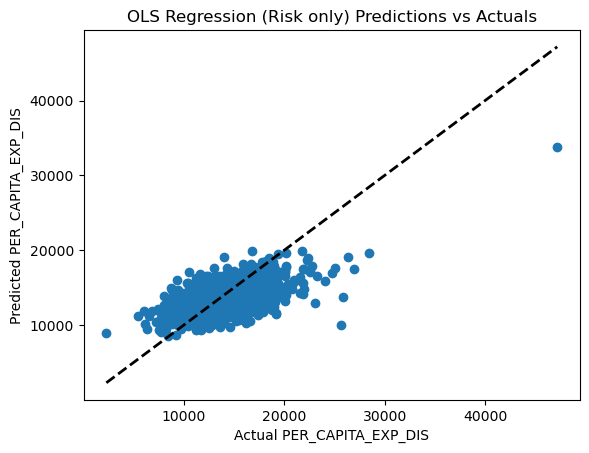

OLS Coefficient (Risk only): 16847.87679291088
Intercept: -2863.10677196709
Risk Only MSE: 5151798.524508728
Risk Only R^2 Score for 2024 data: 0.3473815978193916


Text(0.5, 1.0, 'OLS: Expenditure vs Risk Score for DIS (2024)')

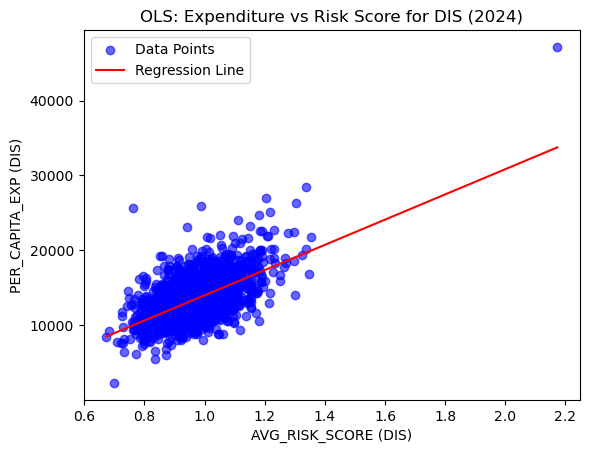

In [13]:
import matplotlib.pyplot as plt

# just risk as feature (2024)
risk_disabled_2024 = data_2024.iloc[:,[0,1,2,9,10]]
X_risk = risk_disabled_2024.iloc[:,4:].values
y_risk = risk_disabled_2024.iloc[:,3].values

ols_model = LinearRegression()
ols_model.fit(X_risk, y_risk)
y_risk_pred = ols_model.predict(X_risk)

plt.scatter(y_risk, y_risk_pred)
plt.xlabel("Actual PER_CAPITA_EXP_DIS")
plt.ylabel("Predicted PER_CAPITA_EXP_DIS")
plt.title("OLS Regression (Risk only) Predictions vs Actuals")
plt.plot([y_risk.min(), y_risk.max()], [y_risk.min(), y_risk.max()], 'k--', lw=2)
plt.show()

risk_slope = ols_model.coef_[0]
risk_intercept = ols_model.intercept_
print(f"OLS Coefficient (Risk only): {risk_slope}\nIntercept: {risk_intercept}")
risk_MSE = np.mean((y_risk - y_risk_pred) ** 2)
print("Risk Only MSE:", risk_MSE)
score_risk = ols_model.score(X_risk, y_risk)
print("Risk Only R^2 Score for 2024 data:", score_risk)
x_line = np.linspace(min(X_risk), max(X_risk), 100)
y_line = risk_intercept + risk_slope * x_line

plt.scatter(X_risk, y_risk, color = 'blue', label = 'Data Points', alpha = 0.6)
plt.plot(x_line, y_line, color = 'red', label = 'Regression Line')
plt.xlabel("AVG_RISK_SCORE (DIS)")
plt.ylabel("PER_CAPITA_EXP (DIS)")
plt.legend()
plt.title("OLS: Expenditure vs Risk Score for DIS (2024)")


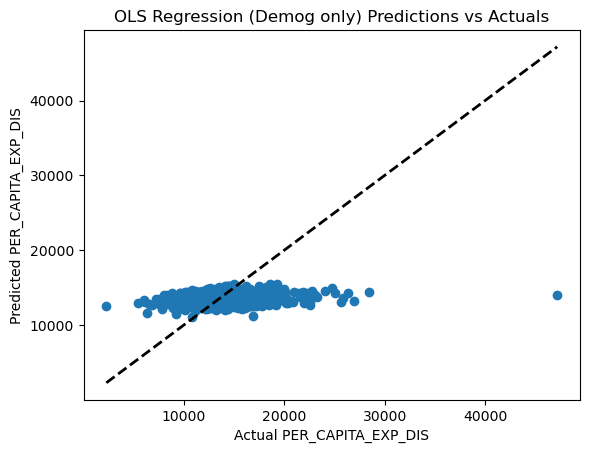

OLS Coefficient (Demog only): 13435.582591025803
Intercept: 249.77389132009557
Demog Only MSE: 7595131.947643887
Demog Only R^2 Score for 2024 data: 0.037865542986288414


Text(0.5, 1.0, 'OLS: Expenditure vs Demog Score for DIS (2024)')

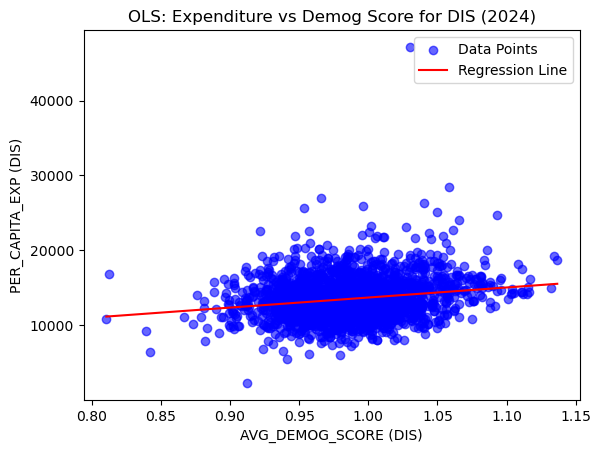

In [14]:
# just demog as feature (2024)
demog_disabled_2024 = data_2024.iloc[:,[0,1,2,9,11]]
X_demog = demog_disabled_2024.iloc[:,4:].values
y_demog = demog_disabled_2024.iloc[:,3].values

ols_model = LinearRegression()
ols_model.fit(X_demog, y_demog)
y_demog_pred = ols_model.predict(X_demog)

plt.scatter(y_demog, y_demog_pred)
plt.xlabel("Actual PER_CAPITA_EXP_DIS")
plt.ylabel("Predicted PER_CAPITA_EXP_DIS")
plt.title("OLS Regression (Demog only) Predictions vs Actuals")
plt.plot([y_demog.min(), y_demog.max()], [y_demog.min(), y_demog.max()], 'k--', lw=2)
plt.show()

demog_slope = ols_model.coef_[0]
demog_intercept = ols_model.intercept_
print(f"OLS Coefficient (Demog only): {demog_slope}\nIntercept: {demog_intercept}")
demog_MSE = np.mean((y_demog - y_demog_pred) ** 2)
print("Demog Only MSE:", demog_MSE)
score_demog = ols_model.score(X_demog, y_demog)
print("Demog Only R^2 Score for 2024 data:", score_demog)
x_line = np.linspace(min(X_demog), max(X_demog), 100)
y_line = demog_intercept + demog_slope * x_line

plt.scatter(X_demog, y_demog, color = 'blue', label = 'Data Points', alpha = 0.6)
plt.plot(x_line, y_line, color = 'red', label = 'Regression Line')
plt.xlabel("AVG_DEMOG_SCORE (DIS)")
plt.ylabel("PER_CAPITA_EXP (DIS)")
plt.legend()
plt.title("OLS: Expenditure vs Demog Score for DIS (2024)")



,YEAR,STATE_NAME,COUNTY_NAME,PER_CAPITA_EXP_DIS,AVG_RISK_SCORE_DIS,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS
0,2024,ALABAMA,AUTAUGA,9492.96,0.87066,0.90321,354.08
1,2024,ALABAMA,BALDWIN,11281.17,0.90201,0.90529,1165.25
2,2024,ALABAMA,BARBOUR,17029.83,0.95669,0.95023,178.75
3,2024,ALABAMA,BIBB,7812.81,0.79991,0.92747,179.92
4,2024,ALABAMA,BLOUNT,11737.26,0.91847,0.91972,308.58


OLS Coefficients:, [16463.38959428  9581.02651965]
OLS Intercept:, -11946.818008016051
OLS Mean Squared Error: 5001222.762094897
OLS R^2 Score for 2024 data: 0.36645620118482736


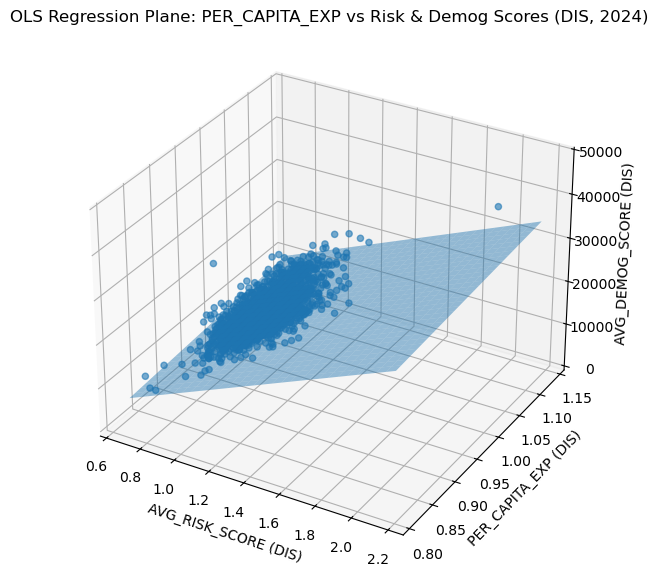

In [22]:
#OLS - 2 factors (AVG_RISK_SCORE, AVG_DEMOG_SCORE) to predict PER_CAPITA_EXP for DIS in 2024
from mpl_toolkits.mplot3d import Axes3D

disabled_2024 = data_2024.iloc[:,[0,1,2,9,10,11,12]]
display(disabled_2024.head())

X = disabled_2024.iloc[:,4:6].values
y = disabled_2024.iloc[:,3].values

ols_model = LinearRegression()
ols_model.fit(X,y)

ols_coefficients = ols_model.coef_
ols_intercept = ols_model.intercept_
y_pred = ols_model.predict(X)
mse = np.mean((y - y_pred) ** 2)
score_2024 = ols_model.score(X, y)

print(f"OLS Coefficients:, {ols_coefficients}")
print(f"OLS Intercept:, {ols_intercept}")
print("OLS Mean Squared Error:", mse)
print("OLS R^2 Score for 2024 data:", score_2024)




fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, alpha=0.6, label='Data')
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 30)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 30)
X1g, X2g = np.meshgrid(x1, x2)
X_grid = np.c_[X1g.ravel(), X2g.ravel()]
Y_grid = ols_model.predict(X_grid).reshape(X1g.shape)
surf = ax.plot_surface(X1g, X2g, Y_grid, alpha=0.45, edgecolor='none') #regression plane
ax.set_xlabel('AVG_RISK_SCORE (DIS)')
ax.set_zlabel('AVG_DEMOG_SCORE (DIS)')
ax.set_ylabel('PER_CAPITA_EXP (DIS)')
ax.set_title('OLS Regression Plane: PER_CAPITA_EXP vs Risk & Demog Scores (DIS, 2024)')
plt.show()



In [ ]:
# WLS score for 2024 data (2 features)
disabled_2024 = data_2024.iloc[:,[0,1,2,9,10,11,12]]
X_2024 = disabled_2024.iloc[:,4:6].values
y_2024 = disabled_2024.iloc[:,3].values
sample_weights_2023 = disabled_2024.iloc[:,6].values
y_pred_2024 = ols_model.predict(X_2024)

score_2024 = ols_model.score(X_2024, y_2024, sample_weight=sample_weights_2023)
print("WLS R^2 Score for 2024 data:", score_2024)



WLS R^2 Score for 2024 data: 0.430601099269046


WLS Coefficients:, [21565.00787822 18418.94979388]
WLS Intercept:, -25177.578652662014
WLS Mean Squared Error: 5620900.564589711
WLS R^2 Score for 2024 data: 0.5300129684584384


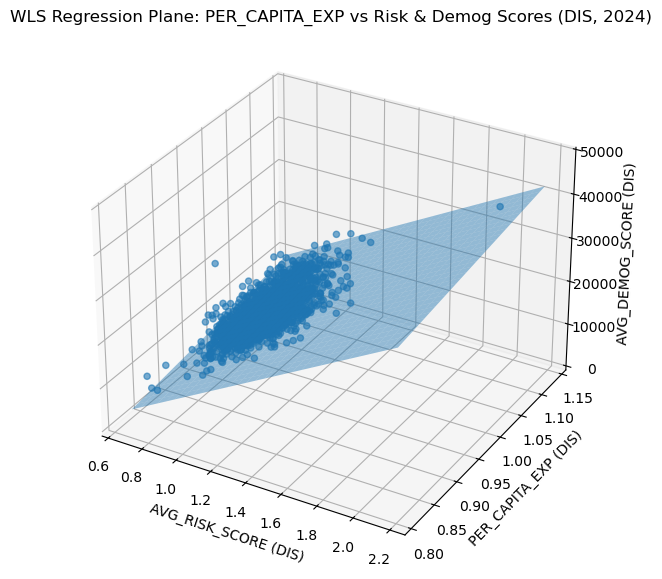

In [17]:
# WLS - 2 factors (AVG_RISK_SCORE, AVG_DEMOG_SCORE)
# to predict PER_CAPITA_EXP for DIS in 2024

wls_X = disabled_2024.iloc[:,4:6].values
wls_y = disabled_2024.iloc[:,3].values
wls_sample_weights = disabled_2024.iloc[:,6].values

wls_model = linear_model.LinearRegression()
wls_model.fit(wls_X, wls_y, sample_weight=wls_sample_weights)

wls_coefficients = wls_model.coef_
wls_intercept = wls_model.intercept_
wls_y_pred = wls_model.predict(wls_X)
wls_mse = np.mean((wls_y - wls_y_pred) ** 2)
wls_score_2024 = wls_model.score(wls_X, wls_y, sample_weight=wls_sample_weights)

print(f"WLS Coefficients:, {wls_coefficients}")
print(f"WLS Intercept:, {wls_intercept}")
print("WLS Mean Squared Error:", wls_mse)
print("WLS R^2 Score for 2024 data:", wls_score_2024)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wls_X[:,0], wls_X[:,1], wls_y, alpha=0.6, label='Data')
x1 = np.linspace(wls_X[:,0].min(), wls_X[:,0].max(), 30)
x2 = np.linspace(wls_X[:,1].min(), wls_X[:,1].max(), 30)
X1g, X2g = np.meshgrid(x1, x2)
X_grid = np.c_[X1g.ravel(), X2g.ravel()]
Y_grid = wls_model.predict(X_grid).reshape(X1g.shape)
surf = ax.plot_surface(X1g, X2g, Y_grid, alpha=0.45, edgecolor='none') #regression plane
ax.set_xlabel('AVG_RISK_SCORE (DIS)')
ax.set_zlabel('AVG_DEMOG_SCORE (DIS)')
ax.set_ylabel('PER_CAPITA_EXP (DIS)')
ax.set_title('WLS Regression Plane: PER_CAPITA_EXP vs Risk & Demog Scores (DIS, 2024)')
plt.show()

In [18]:
# OLS (2 features) for merged data 2020-2024

merged_data = pd.concat([data_2024, data_2023, data_2022, data_2021, data_2020])
merged_data.groupby(['STATE_NAME','COUNTY_NAME'], as_index=False).mean()

disabled_merged = merged_data.iloc[:,[0,1,2,9,10,11,12]]

X__merged = disabled_merged.iloc[:,4:6].values
y__merged = disabled_merged.iloc[:,3].values

display(disabled_merged.head())

ols_model_merged = LinearRegression()
ols_model_merged.fit(X__merged,y__merged)

ols_coefficients = ols_model_merged.coef_
ols_intercept = ols_model_merged.intercept_
y__merged_pred = ols_model_merged.predict(X__merged)
mse_merged = np.mean((y__merged - y__merged_pred) ** 2)
score_merged_OLS = ols_model_merged.score(X__merged, y__merged)

print(f"OLS Coefficients:, {ols_coefficients}")
print(f"OLS Intercept:, {ols_intercept}")
print("OLS Mean Squared Error:", mse_merged)
print("OLS R^2 Score for merged data (2020-2024):", score_merged_OLS)



,YEAR,STATE_NAME,COUNTY_NAME,PER_CAPITA_EXP_DIS,AVG_RISK_SCORE_DIS,AVG_DEMOG_SCORE_DIS,PERSON_YEARS_DIS
0,2024,ALABAMA,AUTAUGA,9492.96,0.87066,0.90321,354.08
1,2024,ALABAMA,BALDWIN,11281.17,0.90201,0.90529,1165.25
2,2024,ALABAMA,BARBOUR,17029.83,0.95669,0.95023,178.75
3,2024,ALABAMA,BIBB,7812.81,0.79991,0.92747,179.92
4,2024,ALABAMA,BLOUNT,11737.26,0.91847,0.91972,308.58


OLS Coefficients:, [13452.65466029  4442.10434224]
OLS Intercept:, -5803.325093938862
OLS Mean Squared Error: 4490900.886542279
OLS R^2 Score for merged data (2020-2024): 0.25876190476439276


In [19]:
# WLS for merged data 2020-2024
wls_model_merged = linear_model.LinearRegression()
sample_weights_merged = disabled_merged.iloc[:,6].values
wls_model_merged.fit(X__merged, y__merged, sample_weight=sample_weights_merged)

sample_weights_merged = disabled_merged.iloc[:,6].values
score_merged_WLS = wls_model_merged.score(X__merged, y__merged, sample_weight=sample_weights_merged)
print("WLS R^2 Score for merged data (2020-2024):", score_merged_WLS)

WLS R^2 Score for merged data (2020-2024): 0.3604616431491695


In [20]:
r_squared_values = pd.DataFrame({
    'Model': ['OLS Risk Only (2024)', 'OLS Demog Only (2024)', 'OLS 2 Factors (2024)', 'WLS 2 Factors (2024)', 'OLS Merged (2020-2024)', 'WLS Merged (2020-2024)'],
    'R^2 Score': [score_risk, score_demog, score_2024, wls_score_2024, score_merged_OLS, score_merged_WLS]
})

display(r_squared_values)

r_squared_values_sorted = r_squared_values.sort_values(by='R^2 Score', ascending=False)
print("\nR^2 Scores Sorted:")
display(r_squared_values_sorted)

,Model,R^2 Score
0,OLS Risk Only (2024),0.347382
1,OLS Demog Only (2024),0.037866
2,OLS 2 Factors (2024),0.430601
3,WLS 2 Factors (2024),0.530013
4,OLS Merged (2020-2024),0.258762
5,WLS Merged (2020-2024),0.360462



R^2 Scores Sorted:


,Model,R^2 Score
3,WLS 2 Factors (2024),0.530013
2,OLS 2 Factors (2024),0.430601
5,WLS Merged (2020-2024),0.360462
0,OLS Risk Only (2024),0.347382
4,OLS Merged (2020-2024),0.258762
1,OLS Demog Only (2024),0.037866


Text(0, 0.5, 'R^2 Score (%)')

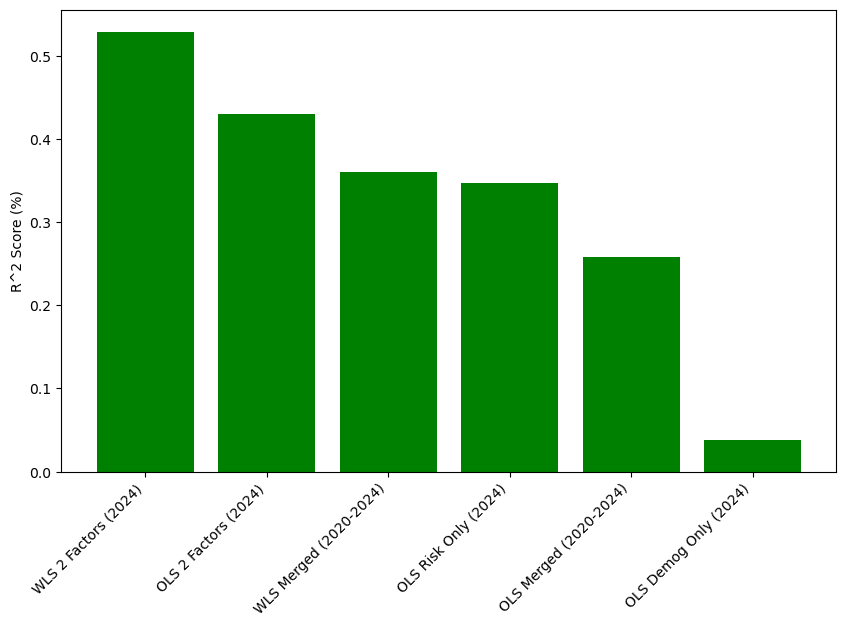

In [26]:
#plot bar chart of results

plt.figure(figsize=(10,6))
plt.bar(r_squared_values_sorted['Model'], r_squared_values_sorted['R^2 Score'], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R^2 Score (%)')